In [13]:
import argparse
import math
import sys
import matplotlib.pyplot as plt

def parse_args(argv=None):
    p = argparse.ArgumentParser(description="Compute KE, PE, and total energy from a trajectory file.")
    p.add_argument("--input", "-i", default="/Users/alex/Desktop/CMP_2025/trajectory.txt", help="Input trajectory file")
    p.add_argument("--output", "-o", default="/Users/alex/Desktop/CMP_2025/energies.txt", help="Output energies file")
    p.add_argument("--mass", "-m", type=float, default=1.0, help="Mass (default: 1.0)")
    p.add_argument("--k", "-k", type=float, default=1.0, help="Spring constant for PE = 0.5*k*x^2 (default: 1.0)")
    if argv is None:
        # when running in a Jupyter kernel, ignore unknown kernel args
        args, _ = p.parse_known_args()
    else:
        args = p.parse_args(argv)
    return args

def parse_line(line):
    line = line.strip()
    if not line or line.startswith("#"):
        return None
    parts = line.split()
    t = float(parts[0])
    x = float(parts[1])
    v = float(parts[2])
    return t, x, v


args = parse_args(None)
rows = []
with open(args.input, "r") as f:
    for ln in f:
        parsed = parse_line(ln)
        if parsed is None:
            continue
        rows.append(parsed)

m = args.mass
k = args.k
out_lines = []
totals = []
for t, x, v in rows:
    ke = 1/2 * m * (v ** 2)
    pe = 1/2 * k * (x ** 2)
    total = ke + pe
    totals.append(total)
    out_lines.append((t, ke, pe, total))

# Write output file with header
with open(args.output, "w") as out:
    out.write("# Time\tKE\tPE\tTotal\n")
    for t, ke, pe, total in out_lines:
        out.write(f"{t:.6f}\t{ke:.6e}\t{pe:.6e}\t{total:.6e}\n")



In [14]:
t_list = [out_lines[i][0] for i in range(len(out_lines))]
ke_list = [out_lines[i][1] for i in range(len(out_lines))]
pe_list = [out_lines[i][2] for i in range(len(out_lines))]
te_list = [out_lines[i][3] for i in range(len(out_lines))]


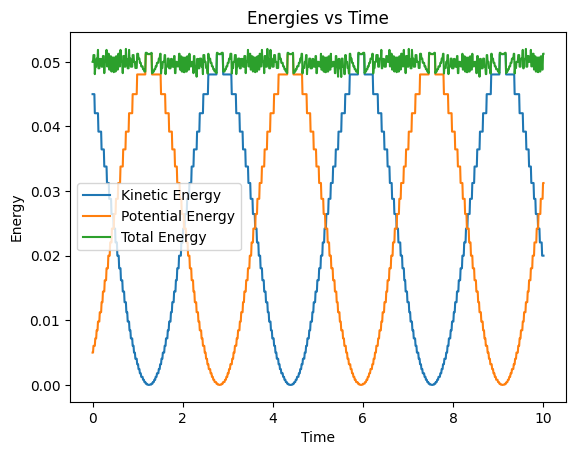

In [15]:
plt.plot(t_list, ke_list, label='Kinetic Energy')
plt.plot(t_list, pe_list, label='Potential Energy')
plt.plot(t_list, te_list, label='Total Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energies vs Time')
plt.legend()
plt.show()

### The Energy is not converved because it is just a numerical simulation!
If it were an ideal system, the energy would be conserved.